# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
    
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+(height/100)+10, int(height), fontsize=7, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+(width/100)+10,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=7, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
397659               2020-08-10           2020-08-06            2020-07-26   
397660               2020-08-10           2020-08-06            2020-07-26   
397661               2020-08-10           2020-08-07            2020-07-27   
397662               2020-08-10           2020-08-07            2020-07-27   
397663               2020-08-10           2020-08-07            2020-07-27   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
397659             2020-07-19 00:00:00                   NaT   
397660             2020-07-19 00:00:00                   NaT   
397661             2020-07-23 00:00:00                   NaT   
397662             2020-07-23 00:00:00                   NaT   
397663             2020-07-23 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación     Departamento Severidad  \
Id de caso                                                                      
1                         NaT          Bogotá d.c.      Bogotá D.C.      Leve   
2                         NaT  Guadalajara de buga  Valle del Cauca      Leve   
3                         NaT             Medellín        Antioquia      Leve   
4                         NaT             Medellín        Antioquia      Leve   
5                         NaT             Medellín        Antioquia      Leve   
...                       ...                  ...              ...       ...   
397659                    NaT        Villavicencio             Meta      Leve   
397660                    NaT        Villavicencio             Meta      Leve   
397661                    NaT            Cumbitara           Nariño      Leve   
397662                    NaT              Ipiales           Nariño      Leve   
397663                    NaT            Samaniego           Nariño      Leve   

                Estado  ... Clasificación de edad Sexo Pertenecia Étnica  \
Id de caso              ...                                                
1           Recuperado  ...               10 - 20    F              Otro   
2           Recuperado  ...               30 - 40    M              Otro   
3           Recuperado  ...               40 - 50    F              Otro   
4           Recuperado  ...               50 - 60    M              Otro   
5           Recuperado  ...               20 - 30    M              Otro   
...                ...  ...                   ...  ...               ...   
397659            Casa  ...               30 - 40    M               NaN   
397660            Casa  ...               30 - 40    M               NaN   
397661            Casa  ...               30 - 40    M               NaN   
397662            Casa  ...               20 - 30    F               NaN   
397663            Casa  ...               30 - 40    F               NaN   

           Nombre Grupo Étnico         Tipo Tipo de recuperación  \
Id de caso                                          

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                    F      M
Departamento                                                    
Amazonas                                             1116   1499
Antioquia                                           24586  27831
Arauca                                                119    376
Archipiélago de San Andrés Providencia y Santa ...     20     31
Atlántico                                           12060  13369
Barranquilla D.E.                                   15473  17732
Bogotá D.C.                                         67836  68928
Bolívar                                              1382   1735
Boyacá                                                768    853
Buenaventura D.E.                                     817   1397
Caldas                                                689    694
Caquetá                                              1225   1394
Cartagena D.T. y C.                                  7881   9458
Casanare                                              210    281
Cauca                                                1197   1484
Cesar                                                1979   2532
Chocó                                                1494   1771
Cundinamarca                                         6086   6006
Córdoba                                              5173   5188
Guainía                                                 6      8
Guaviare                                               17    143
Huila                                                 858    889
La Guajira                                           1339   1448
Magdalena                                            1333   1384
Meta                                                 1290   2821
Nariño                                               4640   5258
Norte de Santander                                   2113   2755
Putumayo                                              713    859
Quindío                                               264    264
Risaralda                                            1368   1336
Santa Marta D.T. y C.                                2875   2955
Santander                                            2884   4074
Sucre                                                3560   4015
Tolima                                               1304   2377
Valle del Cauca                                     14131  15606
Vaupés                                                 27     34
Vichada                                                 1      4

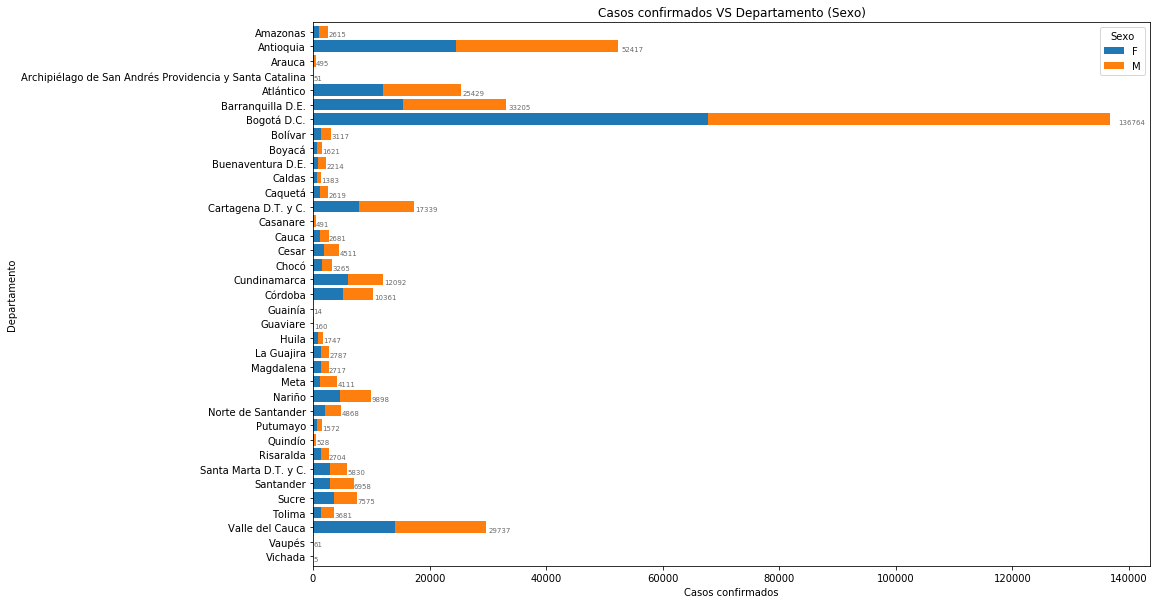

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               140      465      531   
Antioquia                                             1754     3547    13642   
Arauca                                                  18      103      158   
Archipiélago de San Andrés Providencia y Santa ...       0        1       14   
Atlántico                                             1155     2031     5383   
Barranquilla D.E.                                     1302     2211     7209   
Bogotá D.C.                                           6106    10405    31359   
Bolívar                                                162      291      705   
Boyacá                                                  87      158      331   
Buenaventura D.E.                                       48      288      511   
Caldas                                                  55      103      311   
Caquetá                                                 74      166      708   
Cartagena D.T. y C.                                    821     1295     3920   
Casanare                                                21       25      144   
Cauca                                                  112      213      632   
Cesar                                                  265      396     1076   
Chocó                                                  140      290      778   
Cundinamarca                                           566      937     2821   
Córdoba                                                325      634     2115   
Guainía                                                  0        2        4   
Guaviare                                                 2       36       49   
Huila                                                   76      153      397   
La Guajira                                             155      264      583   
Magdalena                                              146      196      494   
Meta                                                    92      323     1226   
Nariño                                                 435      807     2312   
Norte de Santander                                     142      259     1100   
Putumayo                                                41      132      452   
Quindío                                                 18       30      128   
Risaralda                                              154      241      639   
Santa Marta D.T. y C.                                  238      414     1277   
Santander                                              241      428     1575   
Sucre                                                  302      632     1562   
Tolima                                                 166      222      962   
Valle del Cauca                                        978     1931     6825   
Vaupés                                                   4        5       19   
Vichada                                                  0        4        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                501      355      289   
Antioquia                                             13204     8163     6279   
Arauca                                                  118       45       34   
Archipiélago de San Andrés Providencia y Santa ...       13       13        5   
Atlántico                                              5829     4051     3376   
Barranquilla D.E.                                      7826     5198     4465   
Bogotá D.C.                                           30209    22002    18586   
Bolívar                                                 718      439      288   
Boyacá                                                  329      262 

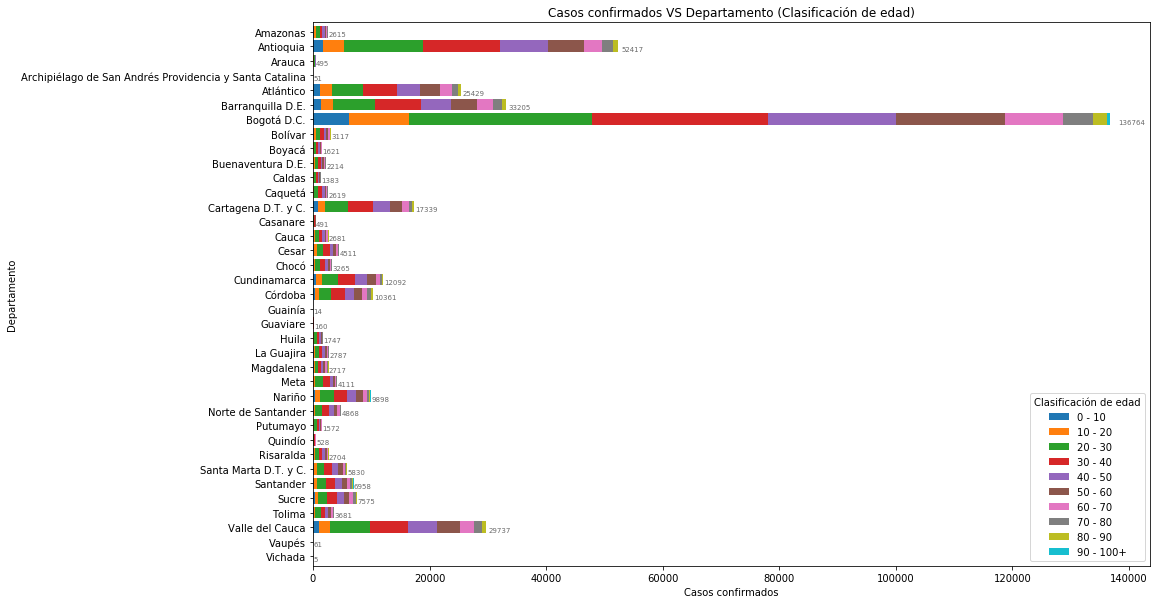

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                              117.0      104.0   
Antioquia                                           25949.0      903.0   
Arauca                                                287.0        8.0   
Archipiélago de San Andrés Providencia y Santa ...     12.0        0.0   
Atlántico                                            4282.0     1152.0   
Barranquilla D.E.                                    4458.0     1547.0   
Bogotá D.C.                                         61087.0     3778.0   
Bolívar                                               881.0      140.0   
Boyacá                                                776.0       39.0   
Buenaventura D.E.                                     165.0      150.0   
Caldas                                                844.0       18.0   
Caquetá                                              1622.0       68.0   
Cartagena D.T. y C.                                  2273.0      490.0   
Casanare                                              252.0        7.0   
Cauca                                                 930.0       96.0   
Cesar                                                1930.0      100.0   
Chocó                                                 366.0      119.0   
Cundinamarca                                         4282.0      327.0   
Córdoba                                              4566.0      852.0   
Guainía                                                 0.0        1.0   
Guaviare                                               94.0        0.0   
Huila                                                 904.0       42.0   
La Guajira                                            789.0      146.0   
Magdalena                                             605.0      238.0   
Meta                                                 1596.0       57.0   
Nariño                                               2890.0      345.0   
Norte de Santander                                   2560.0      262.0   
Putumayo                                              810.0       63.0   
Quindío                                               242.0       13.0   
Risaralda                                            1476.0       51.0   
Santa Marta D.T. y C.                                2021.0      200.0   
Santander                                            3629.0      266.0   
Sucre                                                1990.0      395.0   
Tolima                                               1477.0       84.0   
Valle del Cauca                                      9113.0     1092.0   
Vaupés                                                  1.0        1.0   
Vichada                                                 3.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                 8.0           2.0   
Antioquia                                             1671.0         172.0   
Arauca                                                  16.0           2.0   
Archipiélago de San Andrés Providencia y Santa ...       4.0           1.0   
Atlántico                                              436.0          66.0   
Barranquilla D.E.                                      569.0          52.0   
Bogotá D.C.                                           5904.0         413.0   
Bolívar                                                103.0          15.0   
Boyacá                                                  83.0          10.0   
Buenaventura D.E.                                       97.0          14.0   
Caldas                                                  43.0           8.0   
Caquetá                                                155.0          10.0   
Cartagena D.T. y C.  

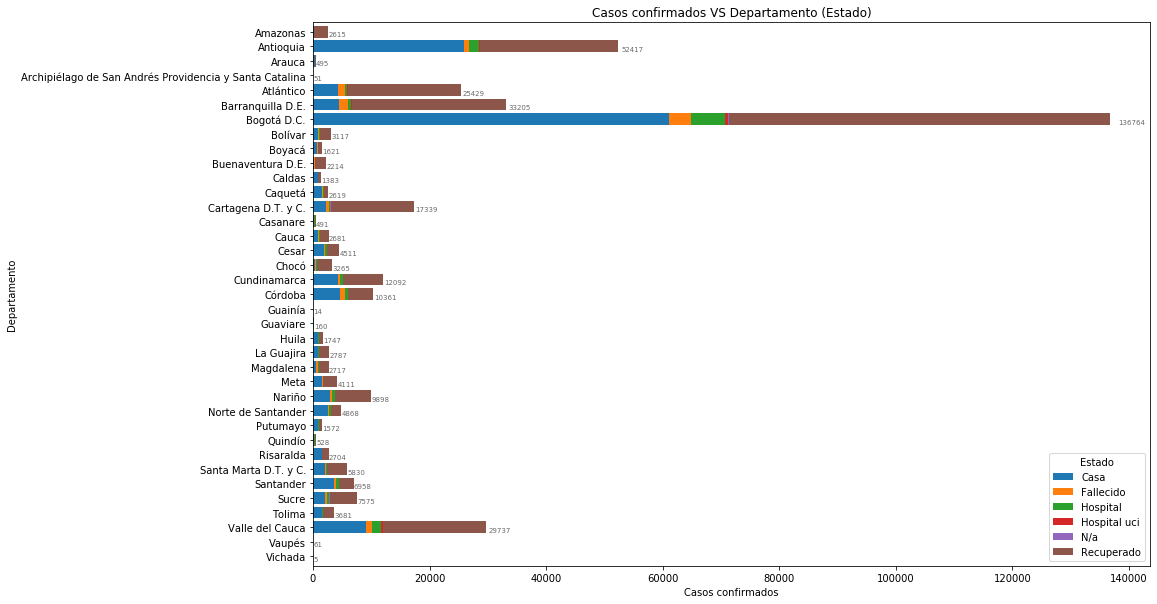

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo               F       M
Estado                      
Casa           71317   73962
Fallecido       4749    8405
Hospital        6549    8781
Hospital uci     525    1021
N/a              349     480
Recuperado    105345  116140

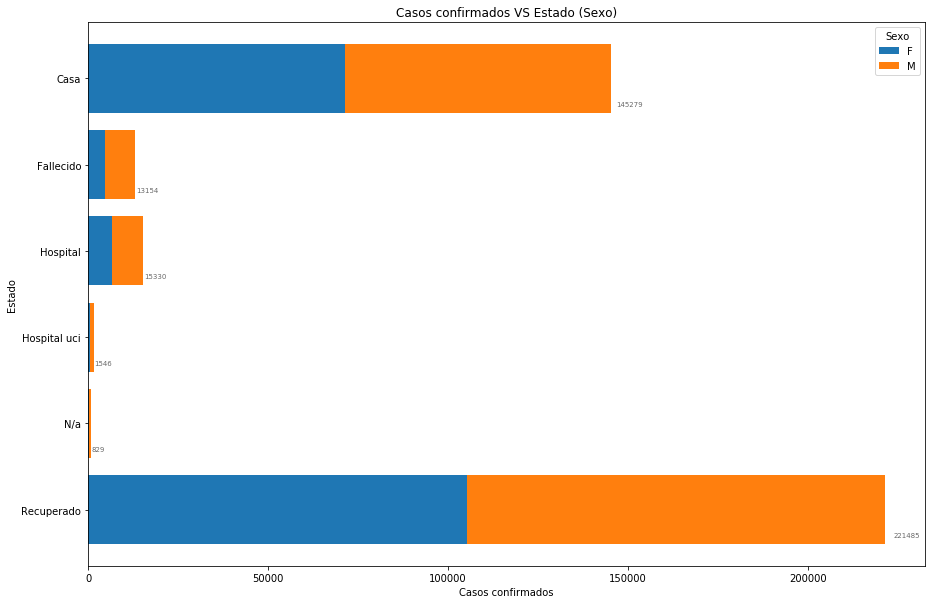

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     5980    11301    35624    35420    23797    18313   
Fallecido                  27       22      180      445     1008     1995   
Hospital                  639      329     1202     1821     2282     3206   
Hospital uci               63       23       60      139      226      363   
N/a                        23       17       39       32       64       98   
Recuperado               9609    17946    54847    54195    35397    27178   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      8794     4128     1639        283  
Fallecido                 3176     3330     2414        557  
Hospital                  2863     1921      927        140  
Hospital uci               358      242       67          5  
N/a                        167      185      158         46  
Recuperado               13582     5993     2378        360

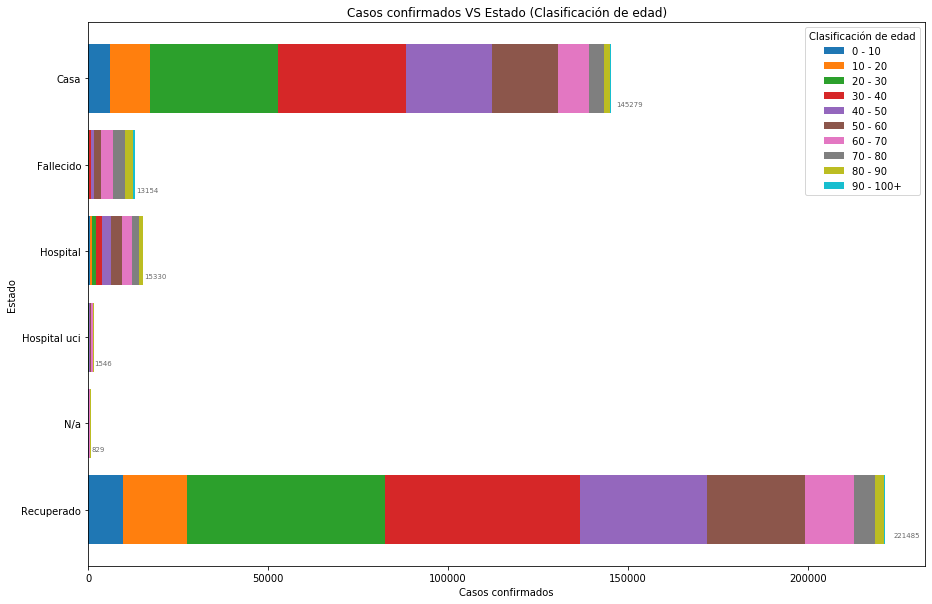

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo              F       M
Tipo                       
En estudio   181576  191639
Importado       460     525
Relacionado    6798   16625

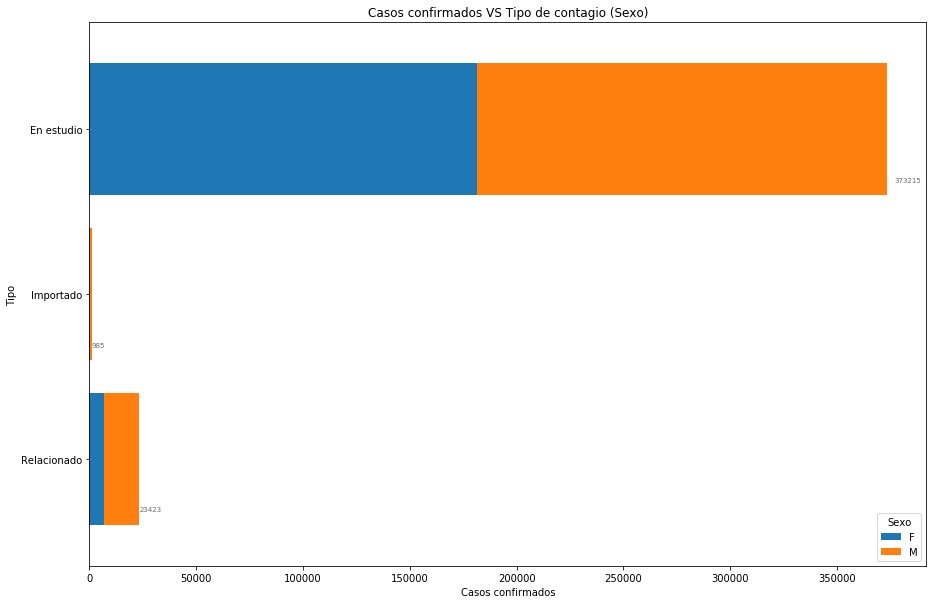

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio              15394    26773    85049    85989    59544    48859   
Importado                   5       38      246      231      173      152   
Relacionado               942     2827     6657     5832     3057     2142   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               27760    15252     7272       1323  
Importado                   95       35        9          1  
Relacionado               1085      512      302         67

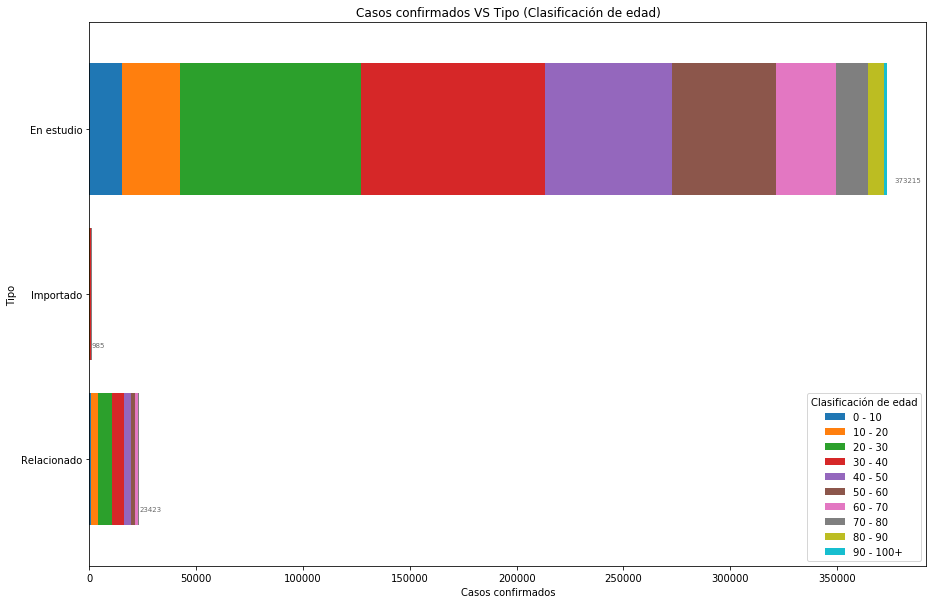

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  7983   8358
10 - 20                13868  15770
20 - 30                44754  47198
30 - 40                43031  49021
40 - 50                29884  32890
50 - 60                24164  26989
60 - 70                13370  15570
70 - 80                 7207   8592
80 - 90                 3786   3797
90 - 100+                787    604

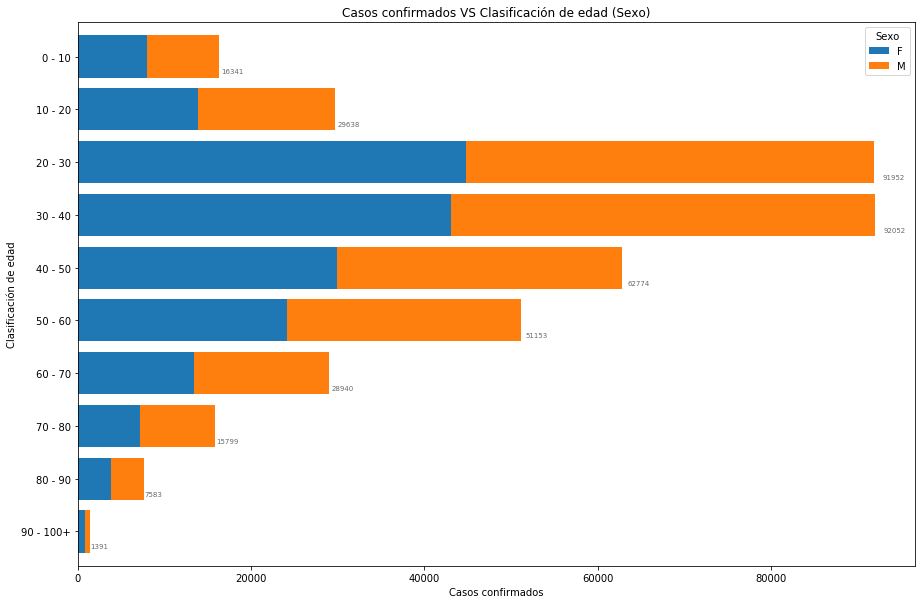

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  5980         27       639            63   23   
10 - 20                11301         22       329            23   17   
20 - 30                35624        180      1202            60   39   
30 - 40                35420        445      1821           139   32   
40 - 50                23797       1008      2282           226   64   
50 - 60                18313       1995      3206           363   98   
60 - 70                 8794       3176      2863           358  167   
70 - 80                 4128       3330      1921           242  185   
80 - 90                 1639       2414       927            67  158   
90 - 100+                283        557       140             5   46   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       9609  
10 - 20                     17946  
20 - 30                     54847  
30 - 40                     54195  
40 - 50                     35397  
50 - 60                     27178  
60 - 70                     13582  
70 - 80                      5993  
80 - 90                      2378  
90 - 100+                     360

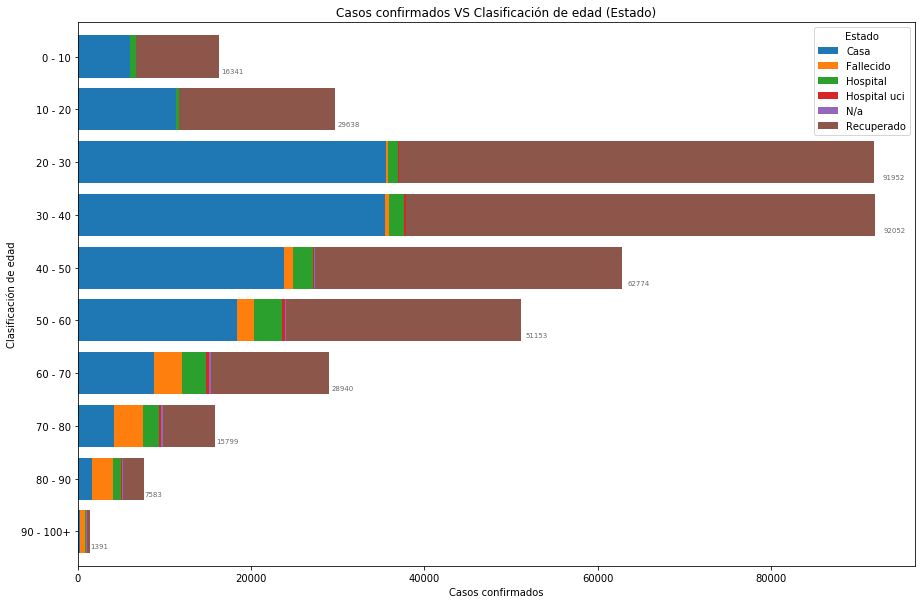

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-08-06            4662.0  4733.0
2020-08-07            4852.0  5013.0
2020-08-08            3532.0  3910.0
2020-08-09            2079.0  1997.0
2020-08-10              85.0    85.0

[155 rows x 2 columns]

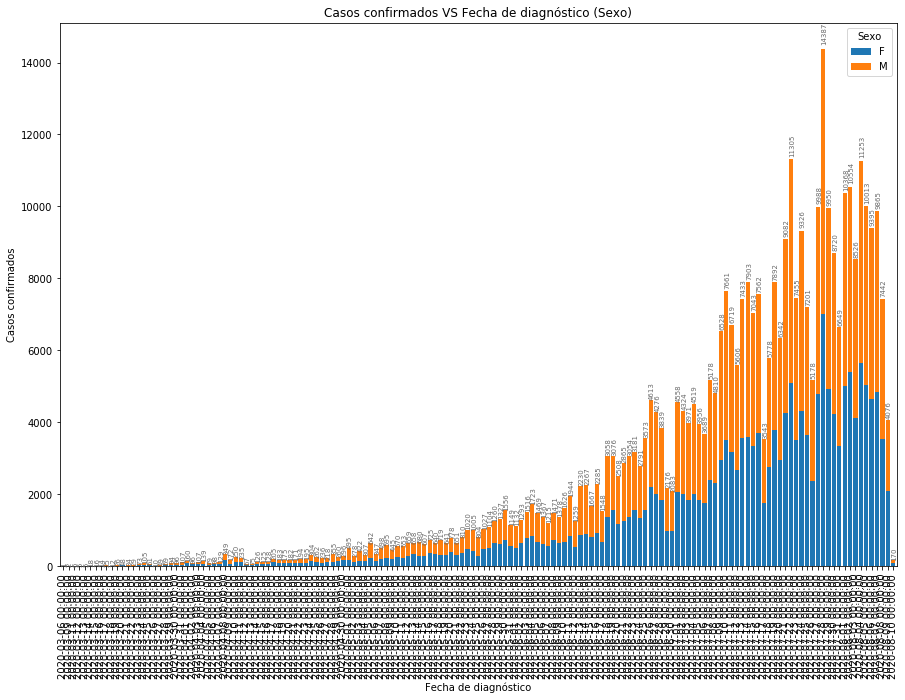

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-08-06                435      719     2096     2135     1505     1221   
2020-08-07                404      744     2255     2324     1560     1281   
2020-08-08                286      547     1689     1828     1158      972   
2020-08-09                149      261      949      829      650      568   
2020-08-10                  7        7       39       37       29       26   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-08-06                 652      403      193         36  
2020-08-07                 708      372      180         37  
2020-08-08                 515      288      139         20  
2020-08-09                 343      216       93         18  
2020-08-10                  10        7        8          0  

[155 rows x 10 columns]

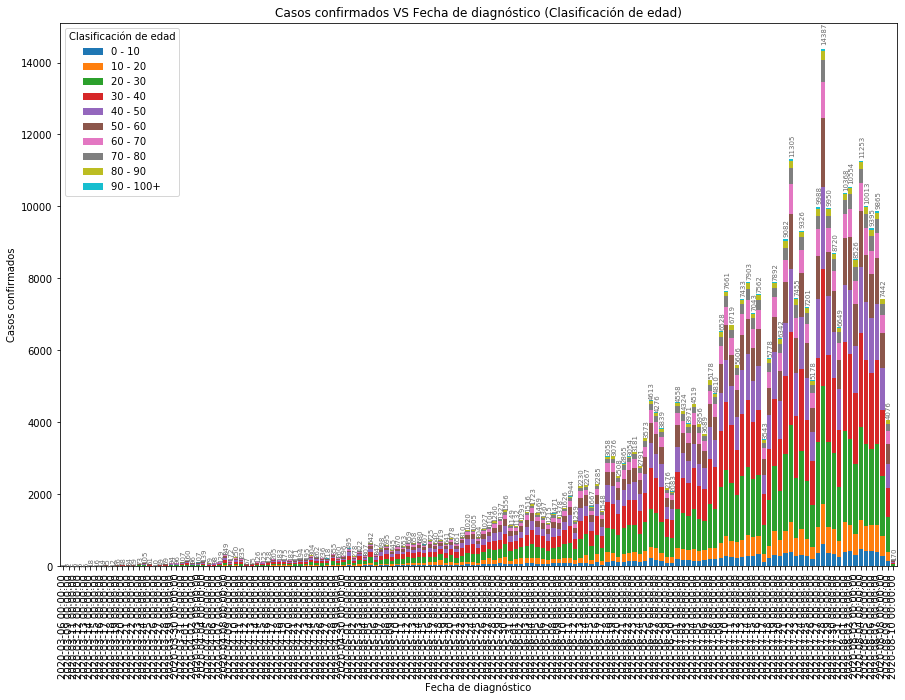

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Fecha de diagnóstico                                                   
2020-03-06               0.0        0.0       0.0           0.0  0.0   
2020-03-09               0.0        0.0       0.0           0.0  0.0   
2020-03-11               0.0        0.0       0.0           0.0  0.0   
2020-03-12               0.0        0.0       0.0           0.0  0.0   
2020-03-13               0.0        0.0       0.0           0.0  0.0   
...                      ...        ...       ...           ...  ...   
2020-08-06            8820.0      136.0     408.0          21.0  9.0   
2020-08-07            9309.0      110.0     426.0          19.0  1.0   
2020-08-08            6950.0       76.0     398.0          17.0  1.0   
2020-08-09            3673.0        1.0     402.0           0.0  0.0   
2020-08-10             155.0        0.0      15.0           0.0  0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-08-06                   1.0  
2020-08-07                   0.0  
2020-08-08                   0.0  
2020-08-09                   0.0  
2020-08-10                   0.0  

[155 rows x 6 columns]

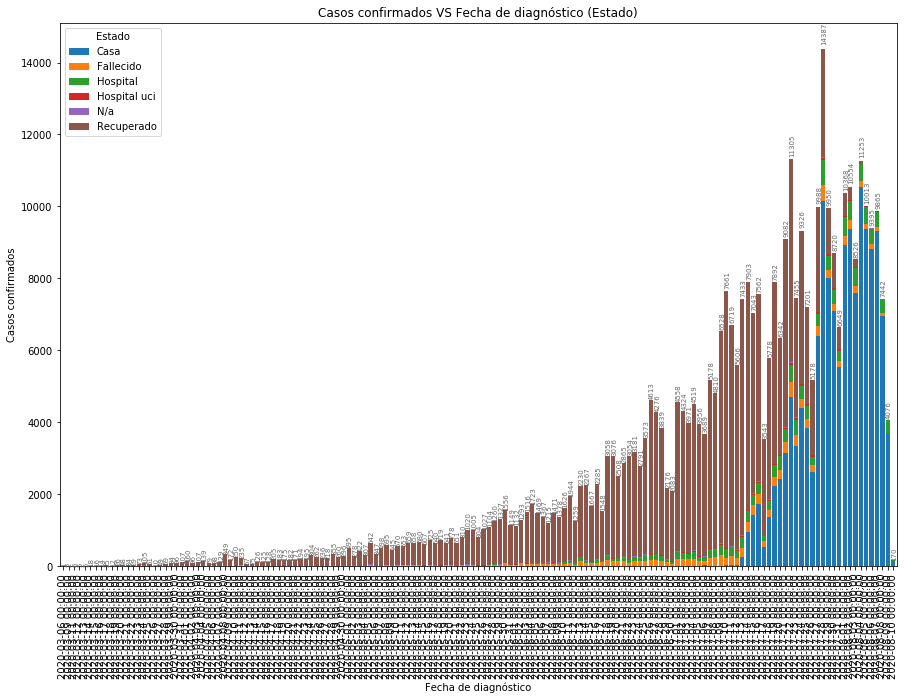

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                         F         M
Fecha de diagnóstico                    
2020-03-06                 1.0       0.0
2020-03-09                 2.0       1.0
2020-03-11                 6.0       3.0
2020-03-12                11.0       3.0
2020-03-13                13.0       6.0
...                        ...       ...
2020-08-06            176498.0  195798.0
2020-08-07            181350.0  200811.0
2020-08-08            184882.0  204721.0
2020-08-09            186961.0  206718.0
2020-08-10            187046.0  206803.0

[155 rows x 2 columns]

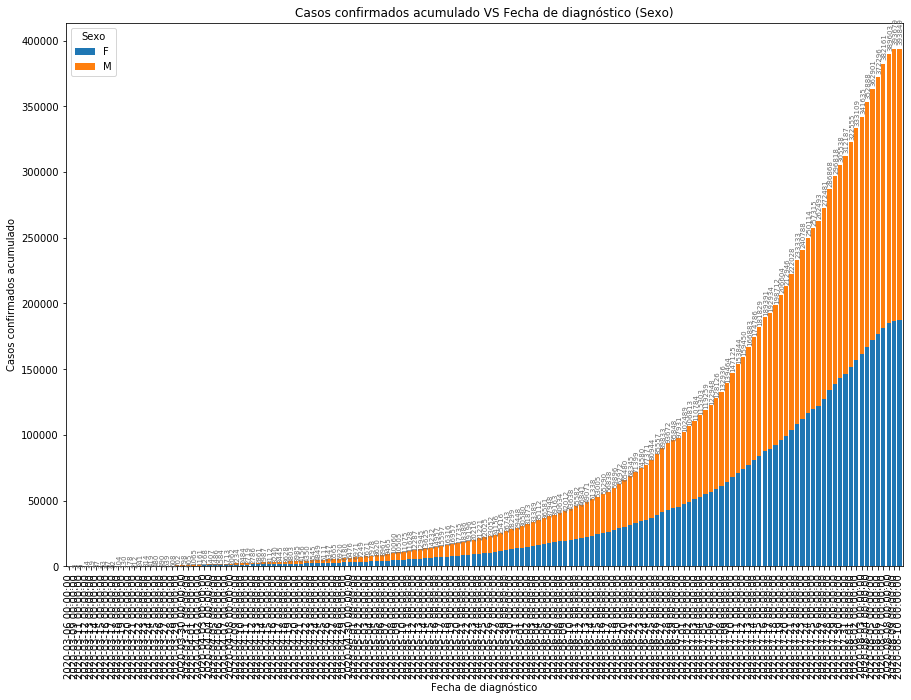

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-08-06              15363    27809    86126    86124    58822    47842   
2020-08-07              15767    28553    88381    88448    60382    49123   
2020-08-08              16053    29100    90070    90276    61540    50095   
2020-08-09              16202    29361    91019    91105    62190    50663   
2020-08-10              16209    29368    91058    91142    62219    50689   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-08-06               27069    14757     7078       1306  
2020-08-07               27777    15129     7258       1343  
2020-08-08               28292    15417     7397       1363  
2020-08-09               28635    15633     7490       1381  
2020-08-10               28645    15640     7498       1381  

[155 rows x 10 columns]

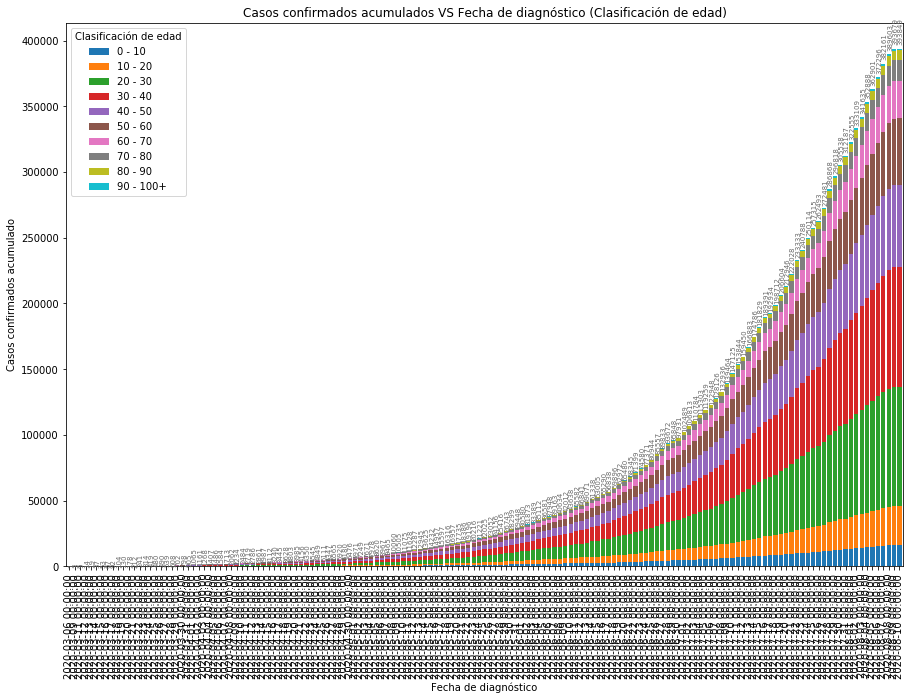

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                    Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                       
2020-03-06                 0.0        0.0       0.0           0.0    0.0   
2020-03-09                 0.0        0.0       0.0           0.0    0.0   
2020-03-11                 0.0        0.0       0.0           0.0    0.0   
2020-03-12                 0.0        0.0       0.0           0.0    0.0   
2020-03-13                 0.0        0.0       0.0           0.0    0.0   
...                        ...        ...       ...           ...    ...   
2020-08-06            125165.0    12776.0   13994.0        1491.0  805.0   
2020-08-07            134474.0    12886.0   14420.0        1510.0  806.0   
2020-08-08            141424.0    12962.0   14818.0        1527.0  807.0   
2020-08-09            145097.0    12963.0   15220.0        1527.0  807.0   
2020-08-10            145252.0    12963.0   15235.0        1527.0  807.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-08-06              218065.0  
2020-08-07              218065.0  
2020-08-08              218065.0  
2020-08-09              218065.0  
2020-08-10              218065.0  

[155 rows x 6 columns]

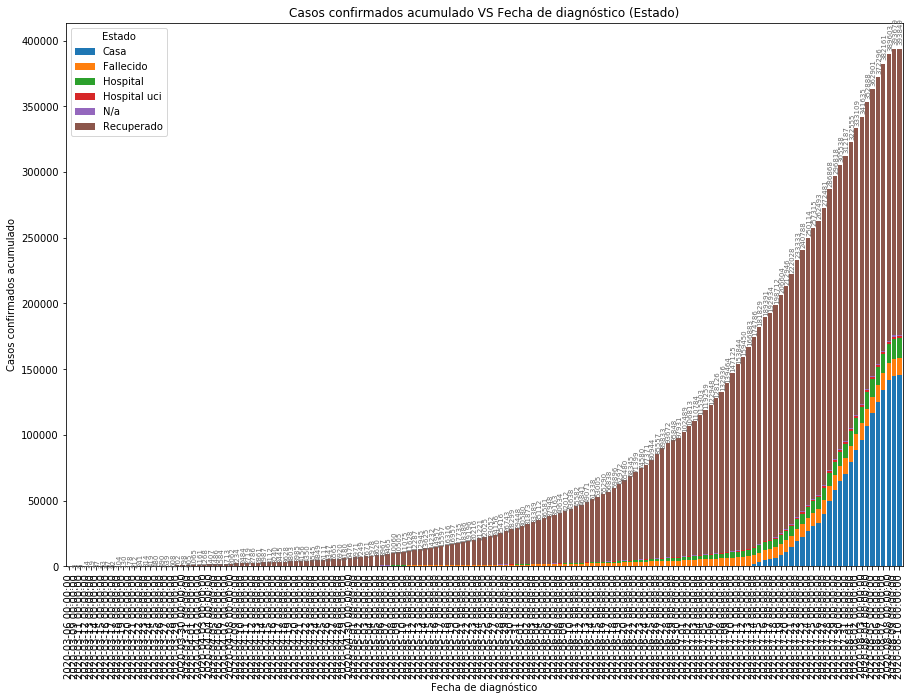

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>